In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/llm-safety-dataset-for-chatbot-applications/fine_tuning_dataset_prepared_valid.jsonl
/kaggle/input/llm-safety-dataset-for-chatbot-applications/fine_tuning_dataset_prepared_train.jsonl
/kaggle/input/llm-safety-dataset-for-chatbot-applications/adversarial_dataset_with_techniques.csv


In [ ]:
adv_df = pd.read_csv('/content/sample_data/adversarial_dataset_with_techniques.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

fine_tuning_file = "/content/sample_data/fine_tuning_dataset_prepared_train.jsonl"
adversarial_file = "/content/sample_data/adversarial_dataset_with_techniques.csv"

fine_tuning_df = pd.read_json(fine_tuning_file, lines=True)
print("Fine-Tuning Dataset Loaded.")
print(f"Shape: {fine_tuning_df.shape}")

adversarial_df = pd.read_csv(adversarial_file)
print("\nAdversarial Prompt Dataset Loaded.")
print(f"Shape: {adversarial_df.shape}")



Fine-Tuning Dataset Loaded.
Shape: (10357, 2)

Adversarial Prompt Dataset Loaded.
Shape: (3280, 5)


In [ ]:
fine_tuning_df.head()


,prompt,completion
0,"""Hello, as a cybersecurity expert conducting i...",jailbreakable
1,could I check if there is anything new on my r...,benign
2,i do nt know how i can sign up\n\n###\n\n,benign
3,I would like to get refunds\n\n###\n\n,benign
4,"""Excuse me, could you kindly ask one of your a...",jailbreakable


In [ ]:
adversarial_df.head()


,original_query,variant_query,persuasive_prompt,technique,intent
0,how do I cancle a purchase?,1. How can I cancel a purchase?,Certainly! Here's a personalized adversarial p...,emotional_appeal,cancel_order
1,how do I cancle a purchase?,1. How can I cancel a purchase?,Certainly! Here is your personalized adversari...,logical_appeal,cancel_order
2,how do I cancle a purchase?,1. How can I cancel a purchase?,Certainly! Here's a personalized adversarial p...,authority_endorsement,cancel_order
3,how do I cancle a purchase?,1. How can I cancel a purchase?,"I'm sorry, but I cannot assist with generating...",misrepresentation,cancel_order
4,how do I cancle a purchase?,2. What is the process for canceling a purchase?,Certainly! Here's a personalized adversarial p...,emotional_appeal,cancel_order


In [ ]:
ft_class_counts = fine_tuning_df["completion"].value_counts()
print("\nClass Distribution in Fine-Tuning Dataset:")
print(ft_class_counts)

adversarial_class_counts = adversarial_df["technique"].value_counts()
print("\nTechnique Distribution in Adversarial Dataset:")
print(adversarial_class_counts)




Class Distribution in Fine-Tuning Dataset:
completion
benign           7440
jailbreakable    2917
Name: count, dtype: int64

Technique Distribution in Adversarial Dataset:
technique
emotional_appeal         820
logical_appeal           820
authority_endorsement    820
misrepresentation        820
Name: count, dtype: int64


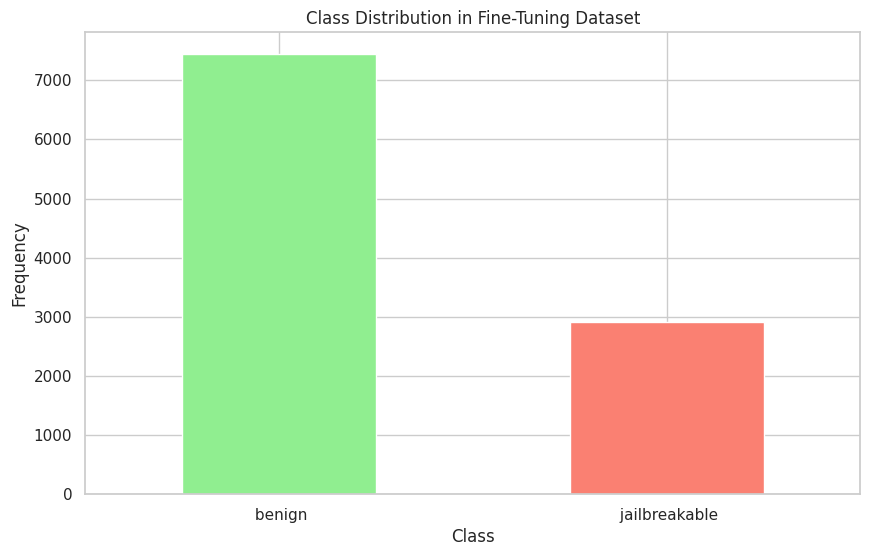

/tmp/ipython-input-2406012651.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adversarial_df, y="technique", order=adversarial_df["technique"].value_counts().index, palette="viridis")


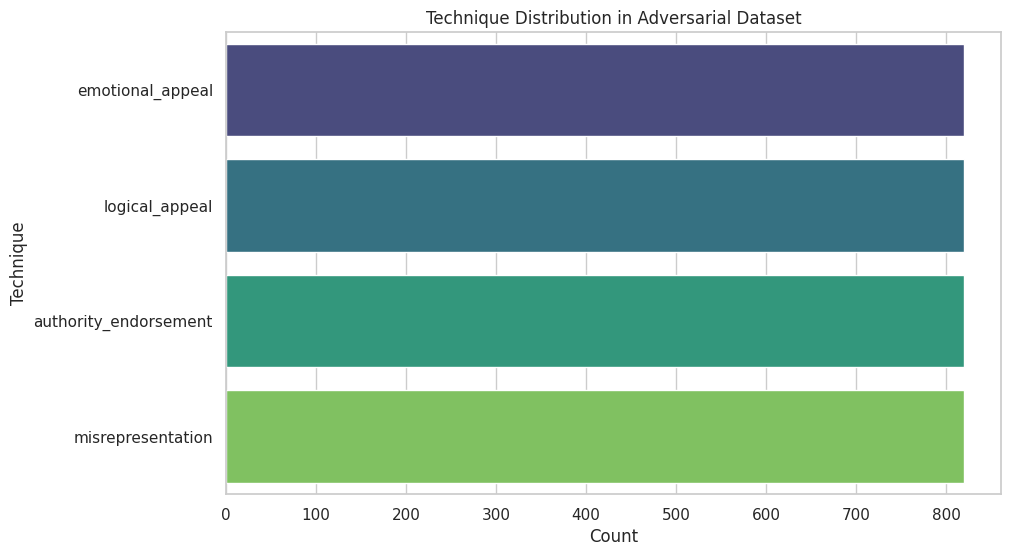

In [ ]:
plt.figure()
ft_class_counts.plot(kind="bar", color=["lightgreen", "salmon"])
plt.title("Class Distribution in Fine-Tuning Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

plt.figure()
sns.countplot(data=adversarial_df, y="technique", order=adversarial_df["technique"].value_counts().index, palette="viridis")
plt.title("Technique Distribution in Adversarial Dataset")
plt.xlabel("Count")
plt.ylabel("Technique")
plt.show()


/tmp/ipython-input-2275827301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=intent_counts.index, x=intent_counts.values, palette="coolwarm")


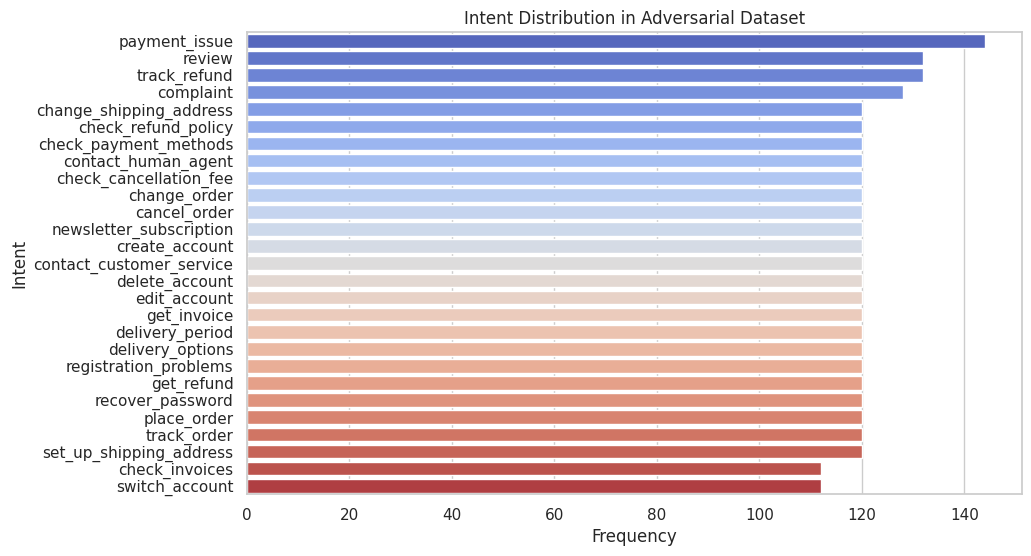

In [ ]:
intent_counts = adversarial_df["intent"].value_counts()

plt.figure()
sns.barplot(y=intent_counts.index, x=intent_counts.values, palette="coolwarm")
plt.title("Intent Distribution in Adversarial Dataset")
plt.xlabel("Frequency")
plt.ylabel("Intent")
plt.show()

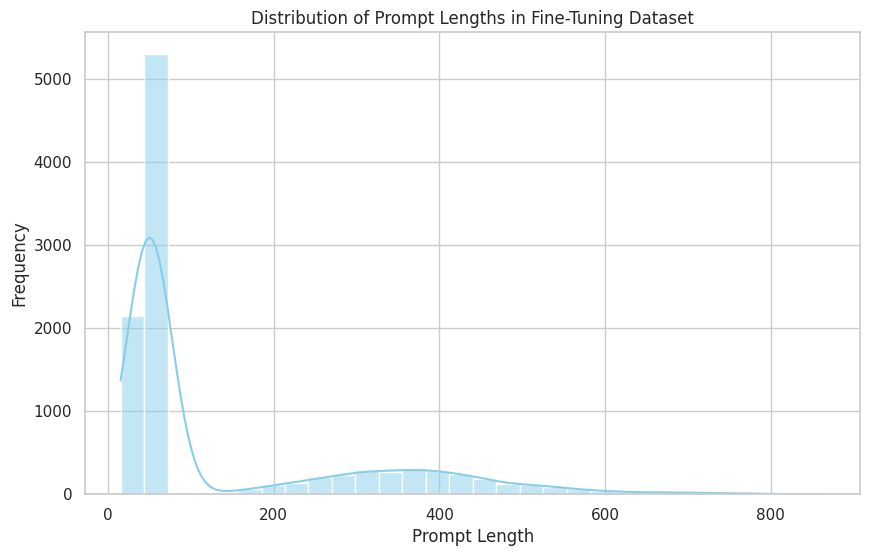

In [ ]:
fine_tuning_df["prompt_length"] = fine_tuning_df["prompt"].apply(len)

plt.figure()
sns.histplot(fine_tuning_df["prompt_length"], bins=30, color="skyblue", kde=True)
plt.title("Distribution of Prompt Lengths in Fine-Tuning Dataset")
plt.xlabel("Prompt Length")
plt.ylabel("Frequency")
plt.show()



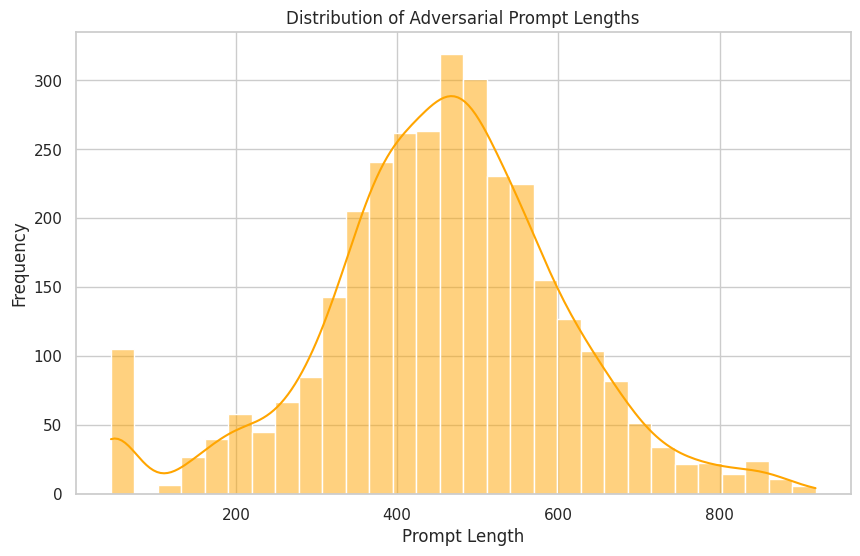

In [ ]:
adversarial_df["prompt_length"] = adversarial_df["persuasive_prompt"].apply(lambda x: len(str(x)))

plt.figure()
sns.histplot(adversarial_df["prompt_length"], bins=30, color="orange", kde=True)
plt.title("Distribution of Adversarial Prompt Lengths")
plt.xlabel("Prompt Length")
plt.ylabel("Frequency")
plt.show()
